**Introduction**

Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years. Banks play a crucial role in market economies. They decide who can get finance and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. Use attached data

**Objective:**

The goal of this competition is to build a model that borrowers can use to help make the best financial decisions.



**Variable Name Description Type**

**SeriousDlqin2yrs:** Person experienced 90 days past due delinquency or worse Y/N

**RevolvingUtilizationOfUnsecuredLines:** Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits percentage

**age:** Age of borrower in years integer

**NumberOfTime3059DaysPastDueNotWorse:** Number of times borrower has been 30-59 days past due but no worse in the last 2 years. integer

**DebtRatio:** Monthly debt payments, alimony,living costs divided by monthy gross income percentage

**MonthlyIncome:** Monthly income real

**NumberOfOpenCreditLinesAndLoans:** Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards) integer

**NumberOfTimes90DaysLate:** Number of times borrower has been 90 days or more past due. integer

**NumberRealEstateLoansOrLines:** Number of mortgage and real estate loans including home equity lines of credit integer

**NumberOfTime60-89DaysPastDueNotWorse:** Number of times borrower has been 60-89 days past due but no worse in the last 2 years. integer

NumberOfDependents: Number of dependents in family excluding themselves (spouse, children etc.) integer




In [1]:
import numpy as np       # linear algebra
import pandas as pd      # data processing, CSV file I/O

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
train_df = pd.read_csv('/content/sample_data/cs-training.csv', index_col=0)

In [3]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
train_df.shape

(150000, 11)

In this  is the training dataset, and we can identify our target variable, '**SeriousDlqin2yrs**'
it is contain only boolum values

training data set have 150000 rows and 11 columns

In [5]:
test_df = pd.read_csv('/content/sample_data/cs-test.csv', index_col=0)

In [6]:
test_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0


In [7]:
test_df.drop('SeriousDlqin2yrs',axis=1, inplace= True)

In [8]:
test_df.shape

(101503, 10)

This is the testing dataset, and we can indentify our target variable, '**SeriousDlqin2yrs**,'

it is contain '**NaN**' values

the test data set have 101503 rows and 10 columns

In [9]:
# Now check the duplicate values in train data set and test data set


print('duplicate values in train data set', train_df.duplicated().sum())

print('duplicate values in test data set', test_df.duplicated().sum())

duplicate values in train data set 609
duplicate values in test data set 328


In [10]:
# Now drop the duplicate values in train data set and test data set

train_df.drop_duplicates(inplace = True)
test_df.drop_duplicates(inplace = True)

In [11]:
print('duplicate values in train data set', train_df.duplicated().sum(), 'data shape is ', train_df.shape)

print('duplicate values in test data set', test_df.duplicated().sum(),'data shape is', test_df.shape)

duplicate values in train data set 0 data shape is  (149391, 11)
duplicate values in test data set 0 data shape is (101175, 10)


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [13]:
train_df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.201700e+05,149391.000000,149391.000000,149391.000000,149391.000000,145563.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,6.675098e+03,8.480892,0.238120,1.022391,0.212503,0.759863
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.438958e+04,5.136515,3.826165,1.130196,3.810523,1.116141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,8.250000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101175 entries, 1 to 101503
Data columns (total 10 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  101175 non-null  float64
 1   age                                   101175 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  101175 non-null  int64  
 3   DebtRatio                             101175 non-null  float64
 4   MonthlyIncome                         81349 non-null   float64
 5   NumberOfOpenCreditLinesAndLoans       101175 non-null  int64  
 6   NumberOfTimes90DaysLate               101175 non-null  int64  
 7   NumberRealEstateLoansOrLines          101175 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  101175 non-null  int64  
 9   NumberOfDependents                    98609 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 8.5 MB


In [15]:
test_df.describe()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,101175.000000,101175.000000,101175.000000,101175.000000,8.134900e+04,101175.000000,101175.000000,101175.000000,101175.000000,98609.000000
mean,5.325446,52.416575,0.408727,345.575251,6.858913e+03,8.476570,0.251119,1.016358,0.224700,0.771116
std,196.473554,14.740538,4.018422,1635.122640,3.651971e+04,5.135767,3.990974,1.110549,3.976727,1.137610
min,0.000000,21.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030298,41.000000,0.000000,0.175168,3.416000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.152453,52.000000,0.000000,0.365687,5.403000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.561952,63.000000,0.000000,0.856104,8.200000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,21821.000000,104.000000,98.000000,268326.000000,7.727000e+06,85.000000,98.000000,37.000000,98.000000,43.000000


In [16]:
null_val_sums = train_df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "percentage": null_val_sums.values / len(train_df) })

,Column,Number of Null Values,percentage
0,SeriousDlqin2yrs,0,0.000000
1,RevolvingUtilizationOfUnsecuredLines,0,0.000000
2,age,0,0.000000
3,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
4,DebtRatio,0,0.000000
5,MonthlyIncome,29221,0.195601
6,NumberOfOpenCreditLinesAndLoans,0,0.000000
7,NumberOfTimes90DaysLate,0,0.000000
8,NumberRealEstateLoansOrLines,0,0.000000
9,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


In tarin datatset have only two columns Null values

columns is 'Monthly income' and anoyher is 'Number of depends'


In [17]:
null_val_sums = test_df.isnull().sum()
pd.DataFrame({"Column": null_val_sums.index, "Number of Null Values": null_val_sums.values,
             "percentage": null_val_sums.values / len(test_df) })

,Column,Number of Null Values,percentage
0,RevolvingUtilizationOfUnsecuredLines,0,0.000000
1,age,0,0.000000
2,NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
3,DebtRatio,0,0.000000
4,MonthlyIncome,19826,0.195957
5,NumberOfOpenCreditLinesAndLoans,0,0.000000
6,NumberOfTimes90DaysLate,0,0.000000
7,NumberRealEstateLoansOrLines,0,0.000000
8,NumberOfTime60-89DaysPastDueNotWorse,0,0.000000
9,NumberOfDependents,2566,0.025362


In [18]:
train_df.apply(lambda x : len(x.unique()))

SeriousDlqin2yrs                             2
RevolvingUtilizationOfUnsecuredLines    125728
age                                         86
NumberOfTime30-59DaysPastDueNotWorse        16
DebtRatio                               114194
MonthlyIncome                            13595
NumberOfOpenCreditLinesAndLoans             58
NumberOfTimes90DaysLate                     19
NumberRealEstateLoansOrLines                28
NumberOfTime60-89DaysPastDueNotWorse        13
NumberOfDependents                          14
dtype: int64

In [19]:
test_df.apply(lambda x: len(x.unique()))

RevolvingUtilizationOfUnsecuredLines    85716
age                                        82
NumberOfTime30-59DaysPastDueNotWorse       16
DebtRatio                               79878
MonthlyIncome                           11977
NumberOfOpenCreditLinesAndLoans            56
NumberOfTimes90DaysLate                    18
NumberRealEstateLoansOrLines               24
NumberOfTime60-89DaysPastDueNotWorse       12
NumberOfDependents                         14
dtype: int64

In [20]:
train_df.shape

(149391, 11)

EDA

Age

In [24]:
print("Training")
print(train_df['age'].describe())
print("\n")
print("Testing")
print(test_df['age'].describe())

Training
count    149391.000000
mean         52.306237
std          14.725962
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64


Testing
count    101175.000000
mean         52.416575
std          14.740538
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64


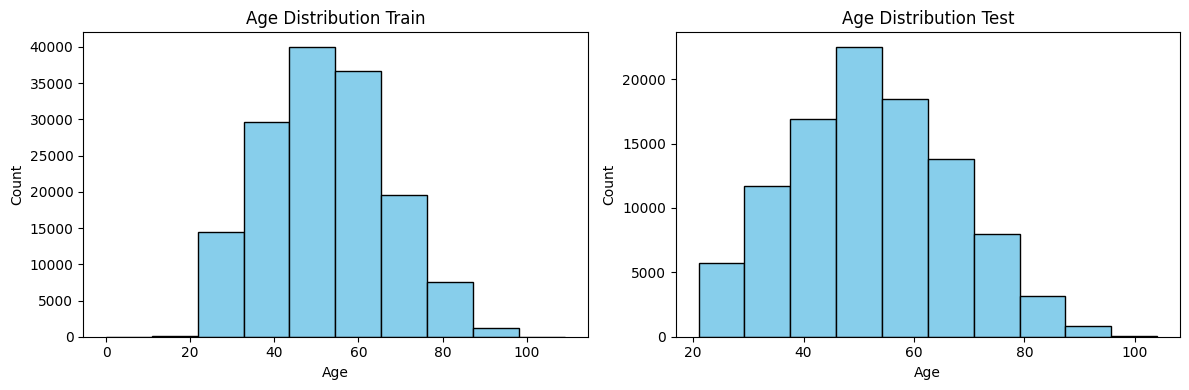

In [25]:
# Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(train_df['age'], bins=10, color='skyblue', edgecolor='black')
ax1.set_title('Age Distribution Train')
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')

ax2.hist(test_df['age'], bins=10, color='skyblue', edgecolor='black')
ax2.set_title('Age Distribution Test')
ax2.set_xlabel('Age')
ax2.set_ylabel('Count')

plt.tight_layout()

plt.show()

In [26]:
len(train_df[train_df['age'] < 19])

1

In [27]:
len(test_df[test_df['age'] < 19])

0

In age  minimum recorded age is 0. This anomaly is unusual since it's implausible for someone at the age of 0 to be eligible for a loan. But the missing value only accounts for one record, we can ignore it.

The plot seems to skewed a bit to the left on both, which means more younger people.

In [28]:
print("Training")
print(train_df['MonthlyIncome'].describe())
print("\n")
print("Testing")
print(test_df['MonthlyIncome'].describe())

Training
count    1.201700e+05
mean     6.675098e+03
std      1.438958e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.250000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64


Testing
count    8.134900e+04
mean     6.858913e+03
std      3.651971e+04
min      0.000000e+00
25%      3.416000e+03
50%      5.403000e+03
75%      8.200000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64


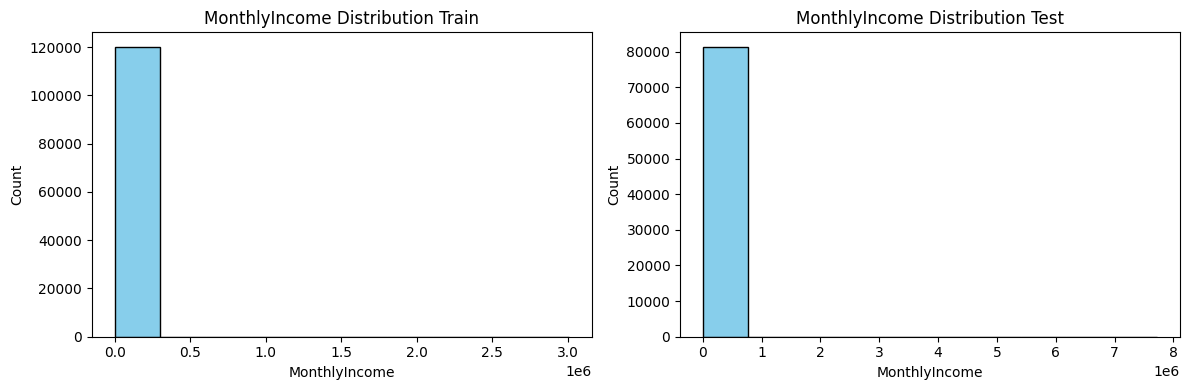

In [29]:
# MonthlyIncome
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(train_df['MonthlyIncome'], bins=10, color='skyblue', edgecolor='black')
ax1.set_title('MonthlyIncome Distribution Train')
ax1.set_xlabel('MonthlyIncome')
ax1.set_ylabel('Count')

ax2.hist(test_df['MonthlyIncome'], bins=10, color='skyblue', edgecolor='black')
ax2.set_title('MonthlyIncome Distribution Test')
ax2.set_xlabel('MonthlyIncome')
ax2.set_ylabel('Count')

plt.tight_layout()

plt.show()

As we can see, there is some absurd outlier too which is very far from the 75 percentile.

we can see the min income is 0 that's not possible at all and how a bank will give loan to a person having zero monthly income? the max value is 3008750 which is 3million, who in the world with a monthly income of 3million and still needs a loan?



In [30]:
len(test_df[test_df['MonthlyIncome'] > 100000])

59

In [31]:
len(test_df[test_df['MonthlyIncome'] < 10000])

68123

In [32]:
print("Training")
print(train_df['NumberOfDependents'].describe())
print("\n")
print("Testing")
print(test_df['NumberOfDependents'].describe())

Training
count    145563.000000
mean          0.759863
std           1.116141
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64


Testing
count    98609.000000
mean         0.771116
std          1.137610
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         43.000000
Name: NumberOfDependents, dtype: float64


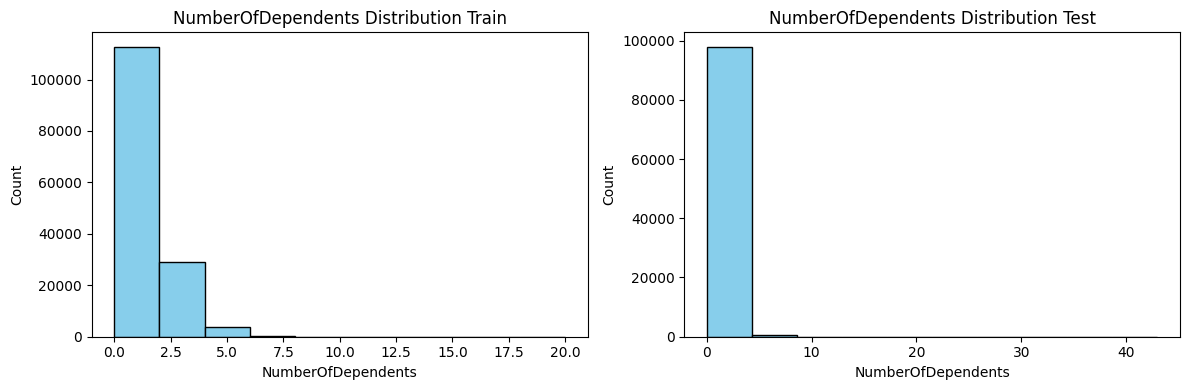

In [33]:
# NumberOfDependents
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.hist(train_df['NumberOfDependents'], bins=10, color='skyblue', edgecolor='black')
ax1.set_title('NumberOfDependents Distribution Train')
ax1.set_xlabel('NumberOfDependents')
ax1.set_ylabel('Count')

ax2.hist(test_df['NumberOfDependents'], bins=10, color='skyblue', edgecolor='black')
ax2.set_title('NumberOfDependents Distribution Test')
ax2.set_xlabel('NumberOfDependents')
ax2.set_ylabel('Count')

plt.tight_layout()

plt.show()

we can see that here too we have outliers, while 75% of the data seem to have of 1 dependant the max of both train and test data seem to have 20 and 43 dependants, which in practical is not possible


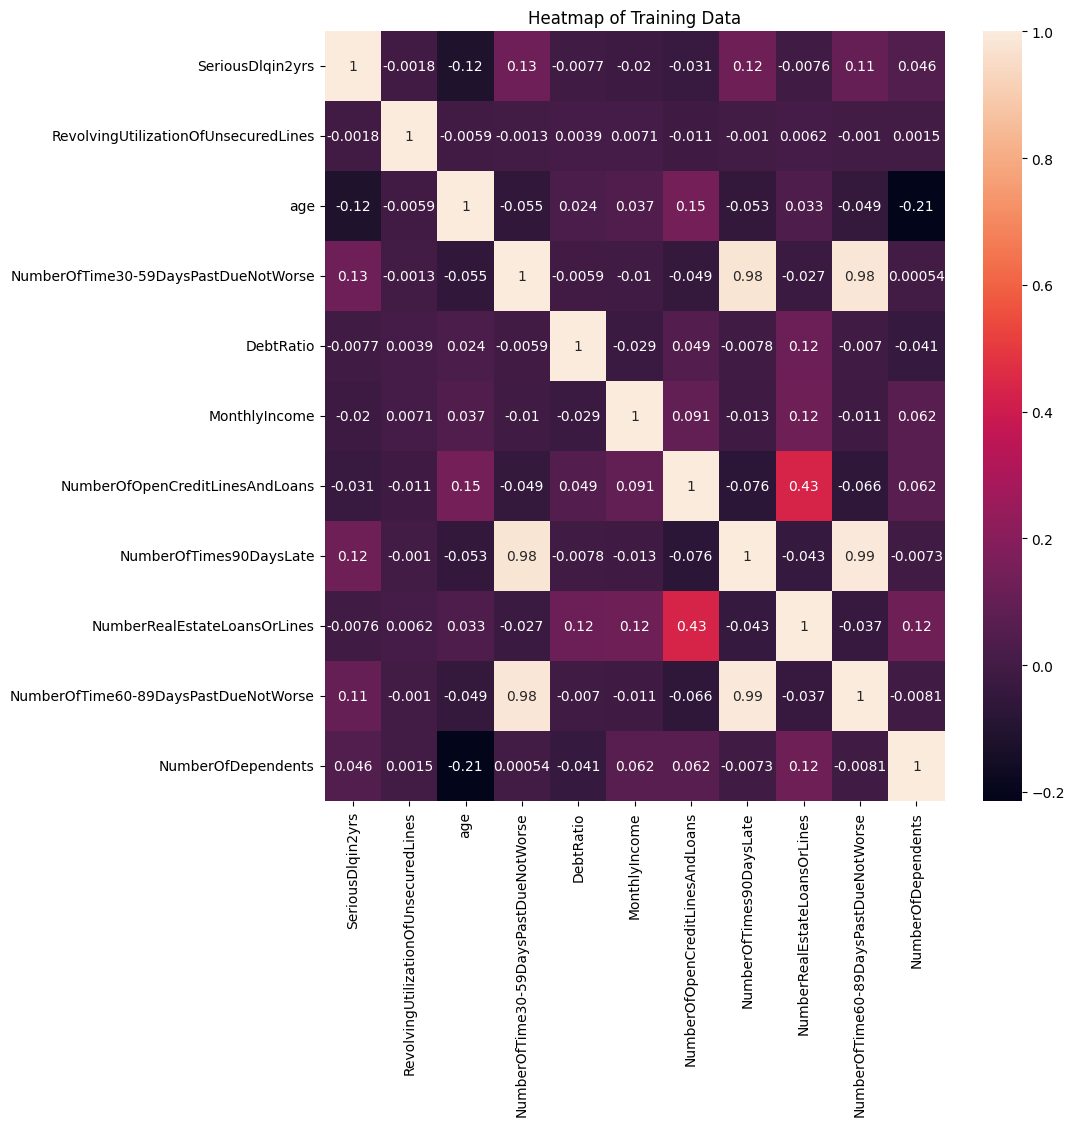

In [34]:
plt.figure(figsize=(10,10))
plt.title("Heatmap of Training Data")
churn_corr = train_df.corr()
churn_corr_top = churn_corr.index
sns.heatmap(train_df[churn_corr_top].corr(), annot=True)
plt.show()

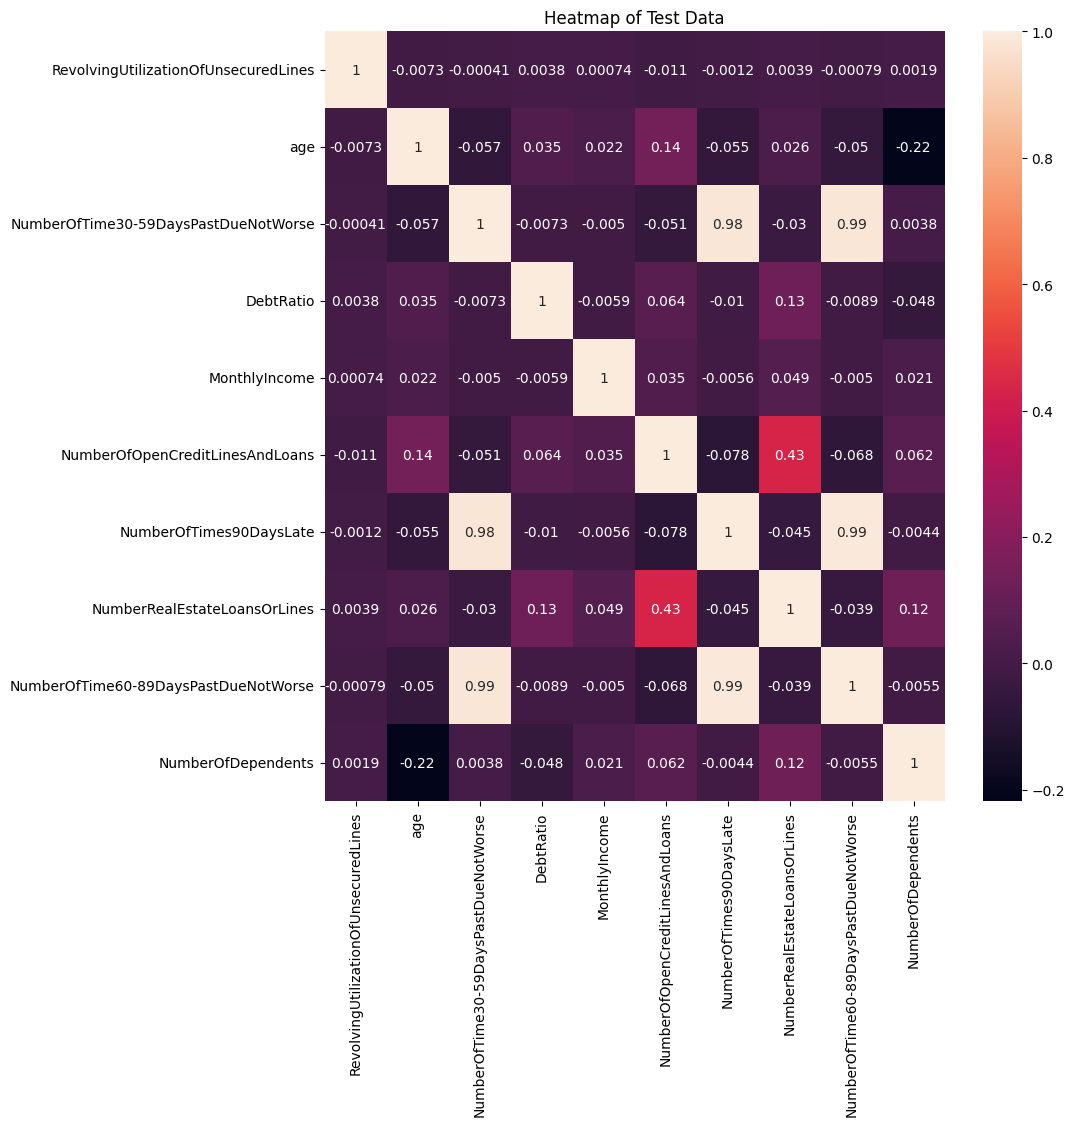

In [35]:
plt.figure(figsize=(10,10))
plt.title("Heatmap of Test Data")
churn_corr = test_df.corr()
churn_corr_top = churn_corr.index
sns.heatmap(test_df[churn_corr_top].corr(), annot=True)
plt.show()

Both in Training and Testing dataset have a similar correlation with 'NumberOfTime30-59DaysPastDueNotWorse' and 'NumberOfTimes90DaysLate' with 0.98 correlation which is really high.

Both Training and Testing dataset have similar behavioral in the correlation to each of their variable.

Class Imbalance

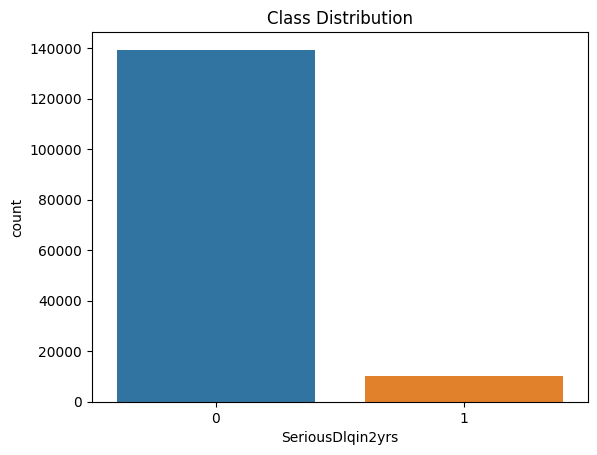

In [36]:
sns.countplot(x='SeriousDlqin2yrs', data=train_df)
plt.title('Class Distribution')
plt.show()

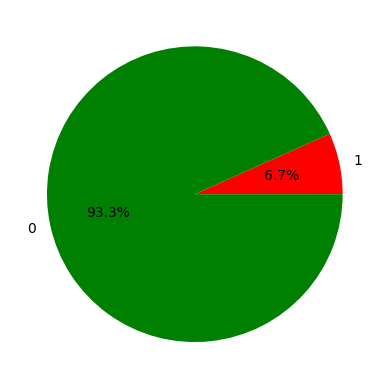

In [37]:
sizes = [train_df['SeriousDlqin2yrs'].sum(), len(train_df) - train_df['SeriousDlqin2yrs'].sum()]
colors = ['r', 'g']


plt.pie(sizes, labels=['1','0'],colors = colors, autopct="%1.1f%%")
plt.show()

An observation from the training data reveals an imbalance in our target variable, 'SeriousDlqin2yrs,' where the majority class is 'No.' This imbalance could lead to model bias in favor of the dominant class, potentially resulting in a high accuracy score. However, while accuracy is valuable, it's not the sole objective. Our goal is to build a model capable of effectively classifying both 'Yes' and 'No' instances. To achieve this, we prioritize evaluation metrics like Recall, Precision, and F1-Score, which offer a more comprehensive assessment of model performance.

Missing Value

Imputing missing value, as we can see we have missing value on both train and test dataset, 'MonthlyIncome' can be impute with median because of the outlier which might make the mean not good fit.

For imputing the 'NumberOfDependents', I can impute it with its mode because it's a discrete variable(no fraction).

I can use more advance technique like regression, but for this one, I am using the mean for 'MonthlyIncome' and mode for 'NumerOfDependents'

In [38]:
#Imputing Train Data
mean_value_train = train_df['MonthlyIncome'].mean()
train_df['MonthlyIncome'].fillna(mean_value_train, inplace=True)
mode_value_train = train_df['NumberOfDependents'].mode().iloc[0]
train_df['NumberOfDependents'].fillna(mode_value_train, inplace=True)

In [39]:
#Imputing Test Data
mean_value_test = test_df['MonthlyIncome'].mean()
test_df['MonthlyIncome'].fillna(mean_value_test, inplace=True)
mode_value_test = test_df['NumberOfDependents'].mode().iloc[0]
test_df['NumberOfDependents'].fillna(mode_value_test, inplace=True)

In [43]:
print('Null values in train data set', train_df.isnull().sum().sum())

print('Null values in test data set', test_df.isnull().sum().sum())

Null values in train data set 0
Null values in test data set 0


Preparing Data for Modelling

In [41]:
X=train_df.iloc[:,1:] # This selectes the required data for modelling.

y= train_df['SeriousDlqin2yrs']

In [42]:
print(X.shape,y.shape)

(149391, 10) (149391,)


In [44]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of Logistic Regression
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict probabilities instead of class labels
y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9339997322504351


In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [47]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.58
Recall: 0.01
F1-Score: 0.03


In [48]:
from sklearn.ensemble import RandomForestClassifier

rmodel = RandomForestClassifier()

# Fit the model on the training data
rmodel.fit(X_train, y_train)

# Predict probabilities instead of class labels
y_pred = rmodel.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9352492302200008


In [297]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.55
Recall: 0.18
F1-Score: 0.27


In [49]:
import xgboost as xgb

# Creating the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Defining the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Training the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Making predictions on the test set
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]


In [50]:
# Evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Accuracy: 0.94
Precision: 0.59
Recall: 0.19
F1-Score: 0.29


Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
columns_to_scale = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

In [53]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_df[columns_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

scaled_data_test = scaler.fit_transform(test_df[columns_to_scale])
scaled_df_test = pd.DataFrame(scaled_data_test, columns=columns_to_scale)

In [54]:
X = scaled_df
y = train_df['SeriousDlqin2yrs']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [56]:
from sklearn.ensemble import RandomForestClassifier

rmodel = RandomForestClassifier()

# Fit the model on the training data
rmodel.fit(X_train, y_train)

# Predict probabilities instead of class labels
y_pred = rmodel.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)

Accuracy: 0.9360524789147218


In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.56
Recall: 0.20
F1-Score: 0.29


In [58]:
import xgboost as xgb

# Creating the DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Defining the parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 3,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

# Training the XGBoost model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Making predictions on the test set
y_pred = model.predict(dtest)
predictions = [round(value) for value in y_pred]

In [59]:
# Evaluation
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.57
Recall: 0.19
F1-Score: 0.28


In [60]:
col_input = test_df
dtest_inputs = xgb.DMatrix(col_input)
probs=model.predict(dtest_inputs)
predictions = [round(value) for value in probs]


LogisticRegression is not given good result on given data set


RandomForest and XGBoost is given good result given data set

